<a href="https://colab.research.google.com/github/ali-talebi/project_industrial/blob/main/detect_defect_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creator : Ali Talebi 
Email : Alitalebishahroodi@gmail.com
## Project : Detect Defect on Object [ Classification problem ( 2 classes ) ] with Deep learning ( CNN + MLP ] 

### Resource of Data set is : Kaggle Website 

In [1]:
!unzip "/content/drive/MyDrive/Master Courses /Term2/project/archive (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5259.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5274.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_528.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5282.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5283.jpeg  
  inflating: cas

In [36]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np 
import os 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
import time 
import tensorflow 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense  , Dropout , BatchNormalization , Conv2D , Flatten , MaxPool2D 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import classification_report 
from tensorflow.keras.utils import plot_model 

In [3]:
Total_img = []
Total_label = []

In [4]:
for i in os.listdir("/content/casting_data/casting_data/train")  : 
  for j in os.listdir(f"/content/casting_data/casting_data/train/{i}"):
    img = cv2.imread(f"/content/casting_data/casting_data/train/{i}/{j}")
    img = cv2.resize(img , (200 , 200) )
    Total_img.append(img)
    Total_label.append(i)







Would You like to see a picture and label : [y/n] y
please enter a number for show image : 156


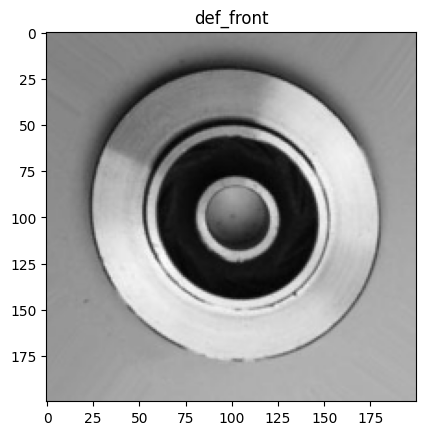

Would You like to see a picture and label : [y/n] y
please enter a number for show image : 56


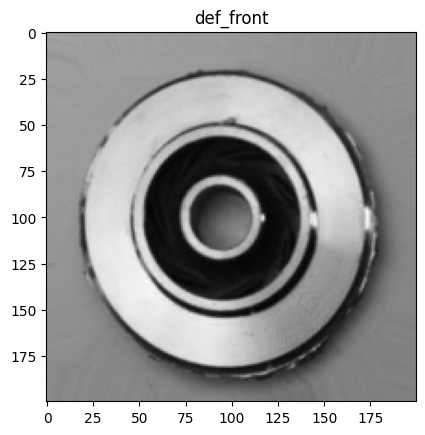

Would You like to see a picture and label : [y/n] n


In [5]:
while 1 : 
  response = input("Would You like to see a picture and label : [y/n] " )
  if response == "y" : 
    vorodi = int(input("please enter a number for show image : "  ) )
    plt.imshow(Total_img[vorodi])
    plt.title(Total_label[vorodi])
    
  else : 

    break 

  plt.show()
  time.sleep(3) 


In [6]:
Total_img = []
Total_label = []

for i in os.listdir("/content/casting_data/casting_data/train")  : 
  for j in os.listdir(f"/content/casting_data/casting_data/train/{i}"):
    img = cv2.imread(f"/content/casting_data/casting_data/train/{i}/{j}")
    img = cv2.resize(img , (100 , 100) )
    Total_img.append(img)
    Total_label.append(i)







In [7]:
len(Total_img)

6633

In [8]:
len(Total_label)

6633

In [9]:
Total_img = np.array(Total_img , dtype = "float" ) / 255.0 
Total_label = np.array(Total_label)

In [10]:
Total_img.shape 

(6633, 100, 100, 3)

In [11]:
Total_label.shape 

(6633,)

In [12]:
Total_label = Total_label.reshape(-1 , 1 ) 

In [13]:
Total_label.shape 

(6633, 1)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(Total_img , Total_label , test_size = 0.2 , random_state = 42 , shuffle = True ) 

In [15]:
Total_label

array([['def_front'],
       ['def_front'],
       ['def_front'],
       ...,
       ['ok_front'],
       ['ok_front'],
       ['ok_front']], dtype='<U9')

In [16]:
obj_label_coder = LabelEncoder()
y_train = obj_label_coder.fit_transform(y_train)
y_test = obj_label_coder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [17]:
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [18]:
y_train = to_categorical(y_train , 2 ) 
y_test  = to_categorical(y_test  , 2 ) 

In [19]:
My_model = Sequential([
    Conv2D(128 , (3,3) , activation = "relu" , input_shape = x_train.shape[1:]  ) , 
    Dropout(0.2) ,
    BatchNormalization() , 
    Conv2D(80 , (3,3) , activation = "relu" ,  ) , 
    Dropout(0.2) ,
    BatchNormalization() ,
    MaxPool2D() , 



    Conv2D(50 , (3,3) , activation = "relu"   ) , 
    Dropout(0.2) ,
    BatchNormalization() , 
    Conv2D(40 , (3,3) , activation = "relu"   ) , 
    Dropout(0.2) ,
    BatchNormalization() ,
    MaxPool2D() , 



    Conv2D(30 , (3,3) , activation = "relu"   ) , 
    BatchNormalization() , 
    Conv2D(20 , (3,3) , activation = "relu"   ) , 
    BatchNormalization() ,
    MaxPool2D() , 
    Flatten() , 

    Dense(128 , activation = "relu" ) , 
    BatchNormalization() ,
    Dropout(0.2) , 
    Dense(50 , activation = "relu" ) ,
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(30 , activation = "relu" ) ,
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(20 , activation = "relu" ) ,
    BatchNormalization() , 
    Dropout(0.2) , 


    Dense(10 , activation = "relu" ) , 
    
    Dense(2 , activation = "softmax" ) , 

])

In [20]:
opti = Adam(learning_rate = 0.01 , ) 

In [21]:
My_model.compile(opti , loss = "categorical_crossentropy" , metrics = ["acc"] ) 

In [44]:
My_model.input 

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'conv2d_input')>

In [45]:
My_model.output 

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_5')>

In [24]:
ali = My_model.fit(x_train , y_train , epochs = 50  , batch_size = 150 , validation_data = (x_test , y_test )    )

Epoch 1/50
36/36 [==============================] - 18s 496ms/step - loss: 0.0796 - acc: 0.9678 - val_loss: 7.0980 - val_acc: 0.4717
Epoch 2/50
36/36 [==============================] - 18s 512ms/step - loss: 0.0781 - acc: 0.9732 - val_loss: 1.6868 - val_acc: 0.7671
Epoch 3/50
36/36 [==============================] - 19s 516ms/step - loss: 0.0799 - acc: 0.9695 - val_loss: 7.9170 - val_acc: 0.4137
Epoch 4/50
36/36 [==============================] - 18s 512ms/step - loss: 0.0603 - acc: 0.9791 - val_loss: 1.8013 - val_acc: 0.7347
Epoch 5/50
36/36 [==============================] - 18s 512ms/step - loss: 0.0568 - acc: 0.9810 - val_loss: 0.9923 - val_acc: 0.7551
Epoch 6/50
36/36 [==============================] - 18s 497ms/step - loss: 0.0580 - acc: 0.9819 - val_loss: 1.5563 - val_acc: 0.6368
Epoch 7/50
36/36 [==============================] - 18s 512ms/step - loss: 0.0401 - acc: 0.9857 - val_loss: 1.6888 - val_acc: 0.6624
Epoch 8/50
36/36 [==============================] - 18s 512ms/step - 

In [25]:
My_model.evaluate(x_test , y_test ) 

42/42 [==============================] - 2s 30ms/step - loss: 1.4683 - acc: 0.7604


[1.468307375907898, 0.7603617310523987]

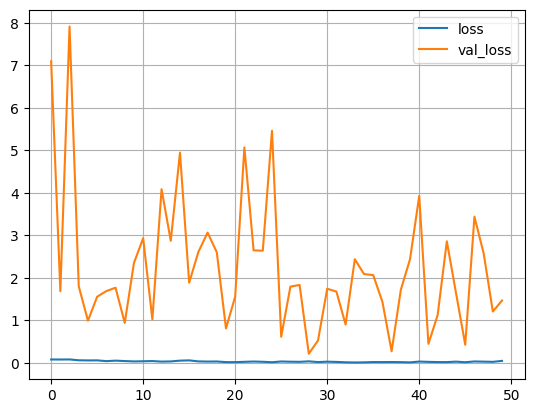

In [28]:
plt.plot(range(50) , ali.history["loss"] , label = "loss" ) 
plt.plot(range(50) , ali.history["val_loss"] , label = "val_loss" ) 
plt.legend()
plt.grid()
plt.show()


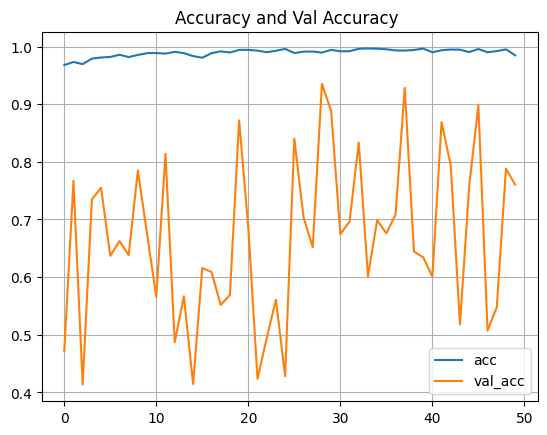

In [50]:
plt.plot(range(50) , ali.history["acc"] , label = "acc" ) 
plt.plot(range(50) , ali.history["val_acc"] , label = "val_acc" ) 
plt.title("Accuracy and Val Accuracy ") 
plt.legend()
plt.grid()
plt.show()

In [30]:
y_predict = My_model.predict(x_test)

42/42 [==============================] - 1s 22ms/step


In [46]:
y_predict

array([[1.0000000e+00, 2.1990735e-08],
       [2.1983384e-01, 7.8016615e-01],
       [9.9972993e-01, 2.7001870e-04],
       ...,
       [3.7448490e-01, 6.2551510e-01],
       [1.7981909e-01, 8.2018095e-01],
       [9.9999797e-01, 2.0599500e-06]], dtype=float32)

In [31]:
result2 = []
for i in y_predict : 
  result = np.argmax(i)
  result2.append(result)

In [48]:
result2[:20]

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [32]:
result3 = obj_label_coder.inverse_transform(result2)

In [49]:
result3

array(['def_front', 'ok_front', 'def_front', ..., 'ok_front', 'ok_front',
       'def_front'], dtype='<U9')

In [33]:
y_test_original = []
for i in y_test : 
  r = np.argmax(i)
  y_test_original.append(r)

y_test_original_decoder = obj_label_coder.inverse_transform(y_test_original)



In [34]:
print(classification_report(result3 , y_test_original_decoder ))

              precision    recall  f1-score   support

   def_front       0.87      0.76      0.81       892
    ok_front       0.61      0.77      0.68       435

    accuracy                           0.76      1327
   macro avg       0.74      0.76      0.74      1327
weighted avg       0.78      0.76      0.77      1327



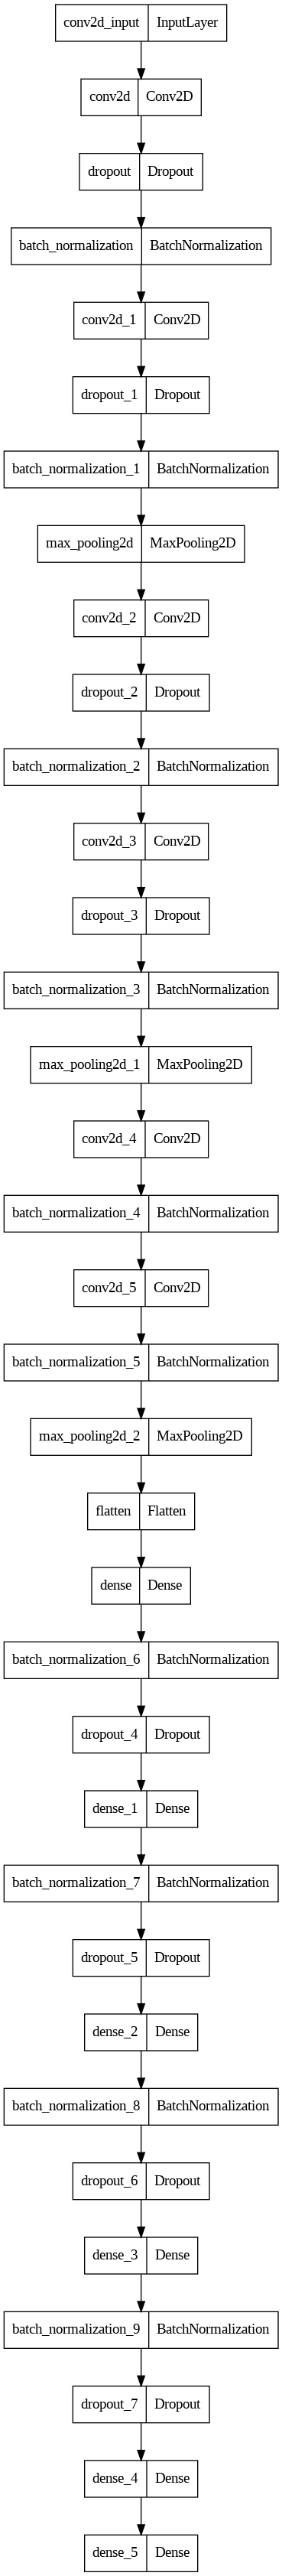

In [37]:
plot_model(My_model, )

In [38]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 17.2 MB/s eta 0:00:00


In [39]:
import visualkeras

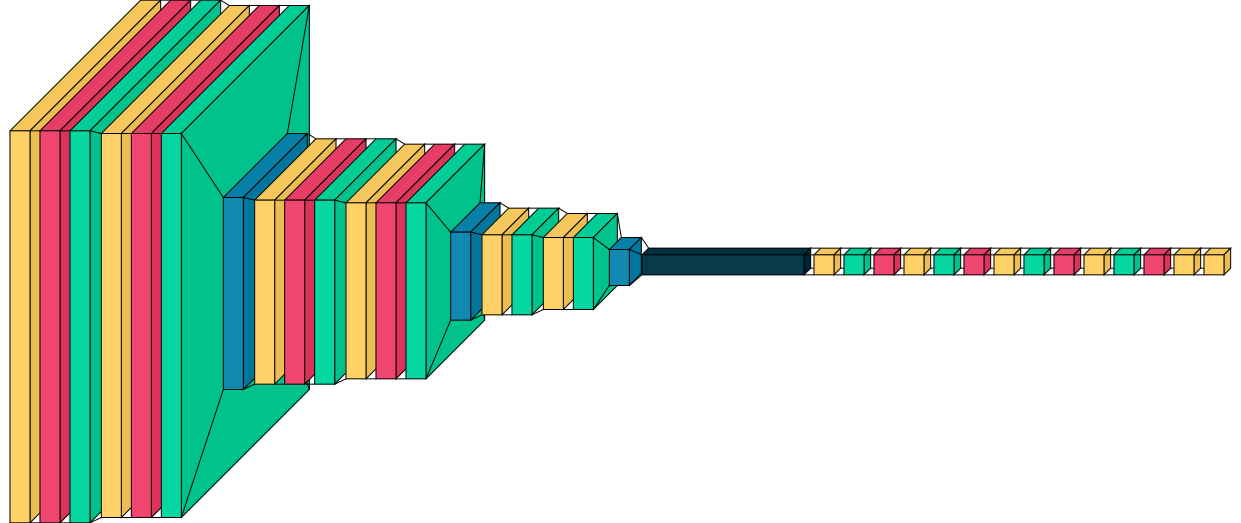

In [40]:
visualkeras.layered_view(My_model)

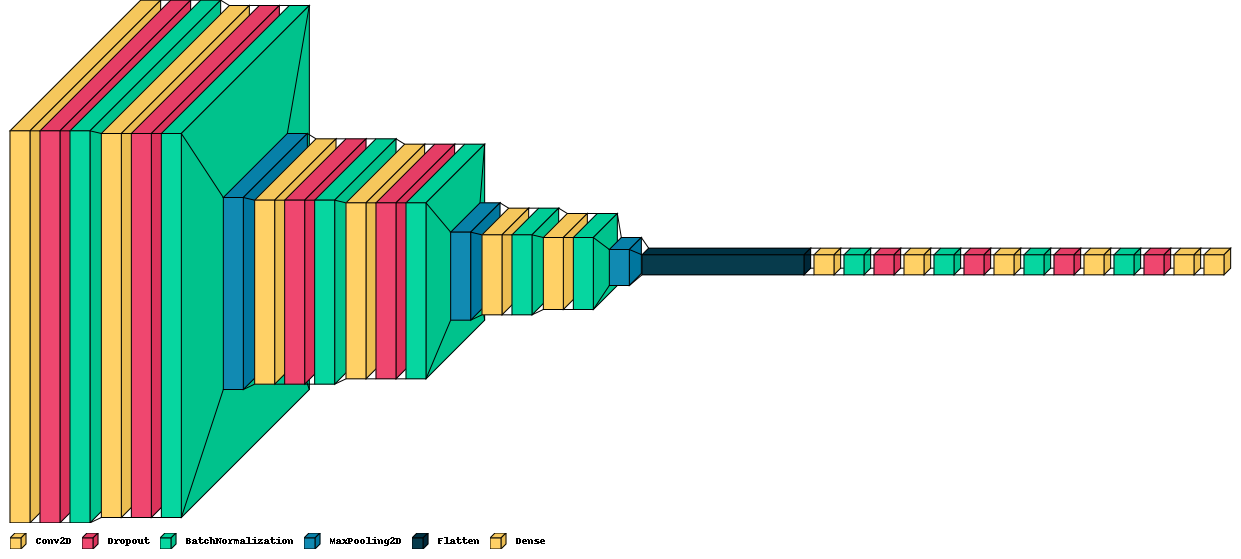

In [42]:
from PIL import ImageFont

#font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(My_model, legend=True)  # font is optional!

In [43]:
My_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 dropout (Dropout)           (None, 98, 98, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 80)        92240     
                                                                 
 dropout_1 (Dropout)         (None, 96, 96, 80)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 80)       320       
 hNormalization)                                        

Would you like to see picture : [y/n] y
Would You like to see which picture 985
Label predict is :  ['def_front']
Label original  is :  ['def_front']


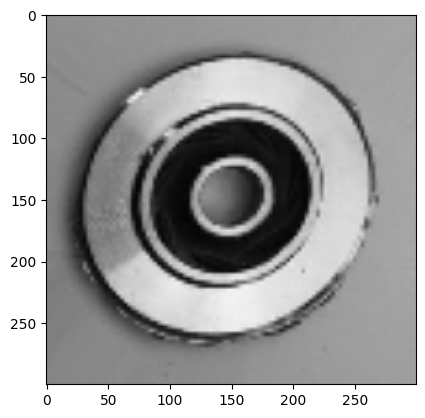

Would you like to see picture : [y/n] y
Would You like to see which picture 1265
Label predict is :  ['ok_front']
Label original  is :  ['ok_front']


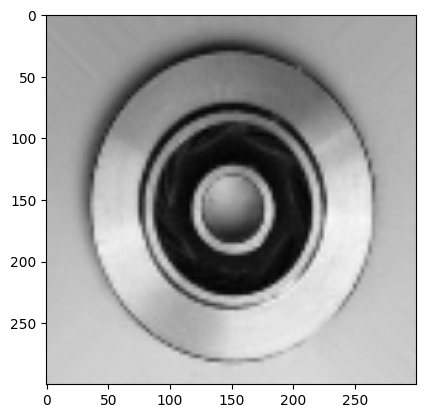

Would you like to see picture : [y/n] y
Would You like to see which picture 796
Label predict is :  ['def_front']
Label original  is :  ['def_front']


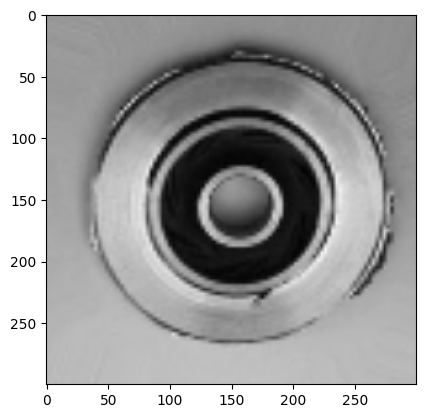

Would you like to see picture : [y/n] y
Would You like to see which picture 3269


IndexError: ignored

In [ ]:
while 1 : 
  response = input("Would you like to see picture : [y/n] " )
  if response == "y" : 
    vorodi = int(input("Would You like to see which picture "))
    plt.imshow(cv2.resize(x_test[vorodi] , (300 , 300 ) ))
    print("Label predict is : " , obj_label_coder.inverse_transform([result2[vorodi]]) )
    print("Label original  is : " , obj_label_coder.inverse_transform([np.argmax(y_test[vorodi])]) )

  else : 
    break 

  plt.show()

  time.sleep(3)